# Multi-channel Deconvolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MBDeconv_FISTA import *

### Load Data

In [2]:
noisy = np.load('Data/noisy_LSST.npy')           # Noisy LSST images in the 3 bands (32 X 32 in this case)
psf_lsst = np.load('Data/psf_LSST.npy')          # PSF of the LSST images in the 3 bands - needs to be at the Euclid resolution (64 X 64 in this case)

euclid = np.load('Data/euclid.npy')              # Euclid image in the VIS band (64 X 64 in this case)
psf_euc = np.load('Data/psf_euclid_vis.npy')     # PSF of the Euclid in the VIS band (64 X 64 in this case)

noisemap = np.load('Data/noisemap_LSST.npy')     # Noise map of the LSST images in the 3 bands and the Euclid image (in the same order)
sed = np.load('Data/sed.npy')                    # Fractional contribution of the 3 bands to the Euclid image

target = np.load('Data/target_HST.npy')          # Target image (HST) - needs to be a multiple of the Euclid resolution (64 X 64 in this case)

### Check Dimensions

In [3]:
print('target:', target.shape)
print('psf_lsst:', psf_lsst.shape)
print('psf_euc:', psf_euc.shape)
print('noisy:', noisy.shape)
print('noisemap:', noisemap.shape)
print('euclid:', euclid.shape)
print('sed:', sed.shape)

target: (64, 64, 3)
psf_lsst: (64, 64, 3)
psf_euc: (64, 64)
noisy: (32, 32, 3)
noisemap: (4,)
euclid: (64, 64)
sed: (3,)


### Run Deconvolution

In [5]:
mbdeconv = runDeconv(noisy, 
                     euclid, 
                     psf_lsst, 
                     psf_euc, 
                     noisemap, 
                     n_iter=200,              # Number of iterations (200 is sufficient for convergence)
                     SED=sed, 
                     frac_contr=0.3)          # Fractional contribution of the constraining term in the loss function found using grid search. No need to change this value

### Plot Outputs

/Users/utsavakhaury/Thesis/Multichannel_Deconv/Multiband-Deconvolution/MBDeconv_FISTA.py:438: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


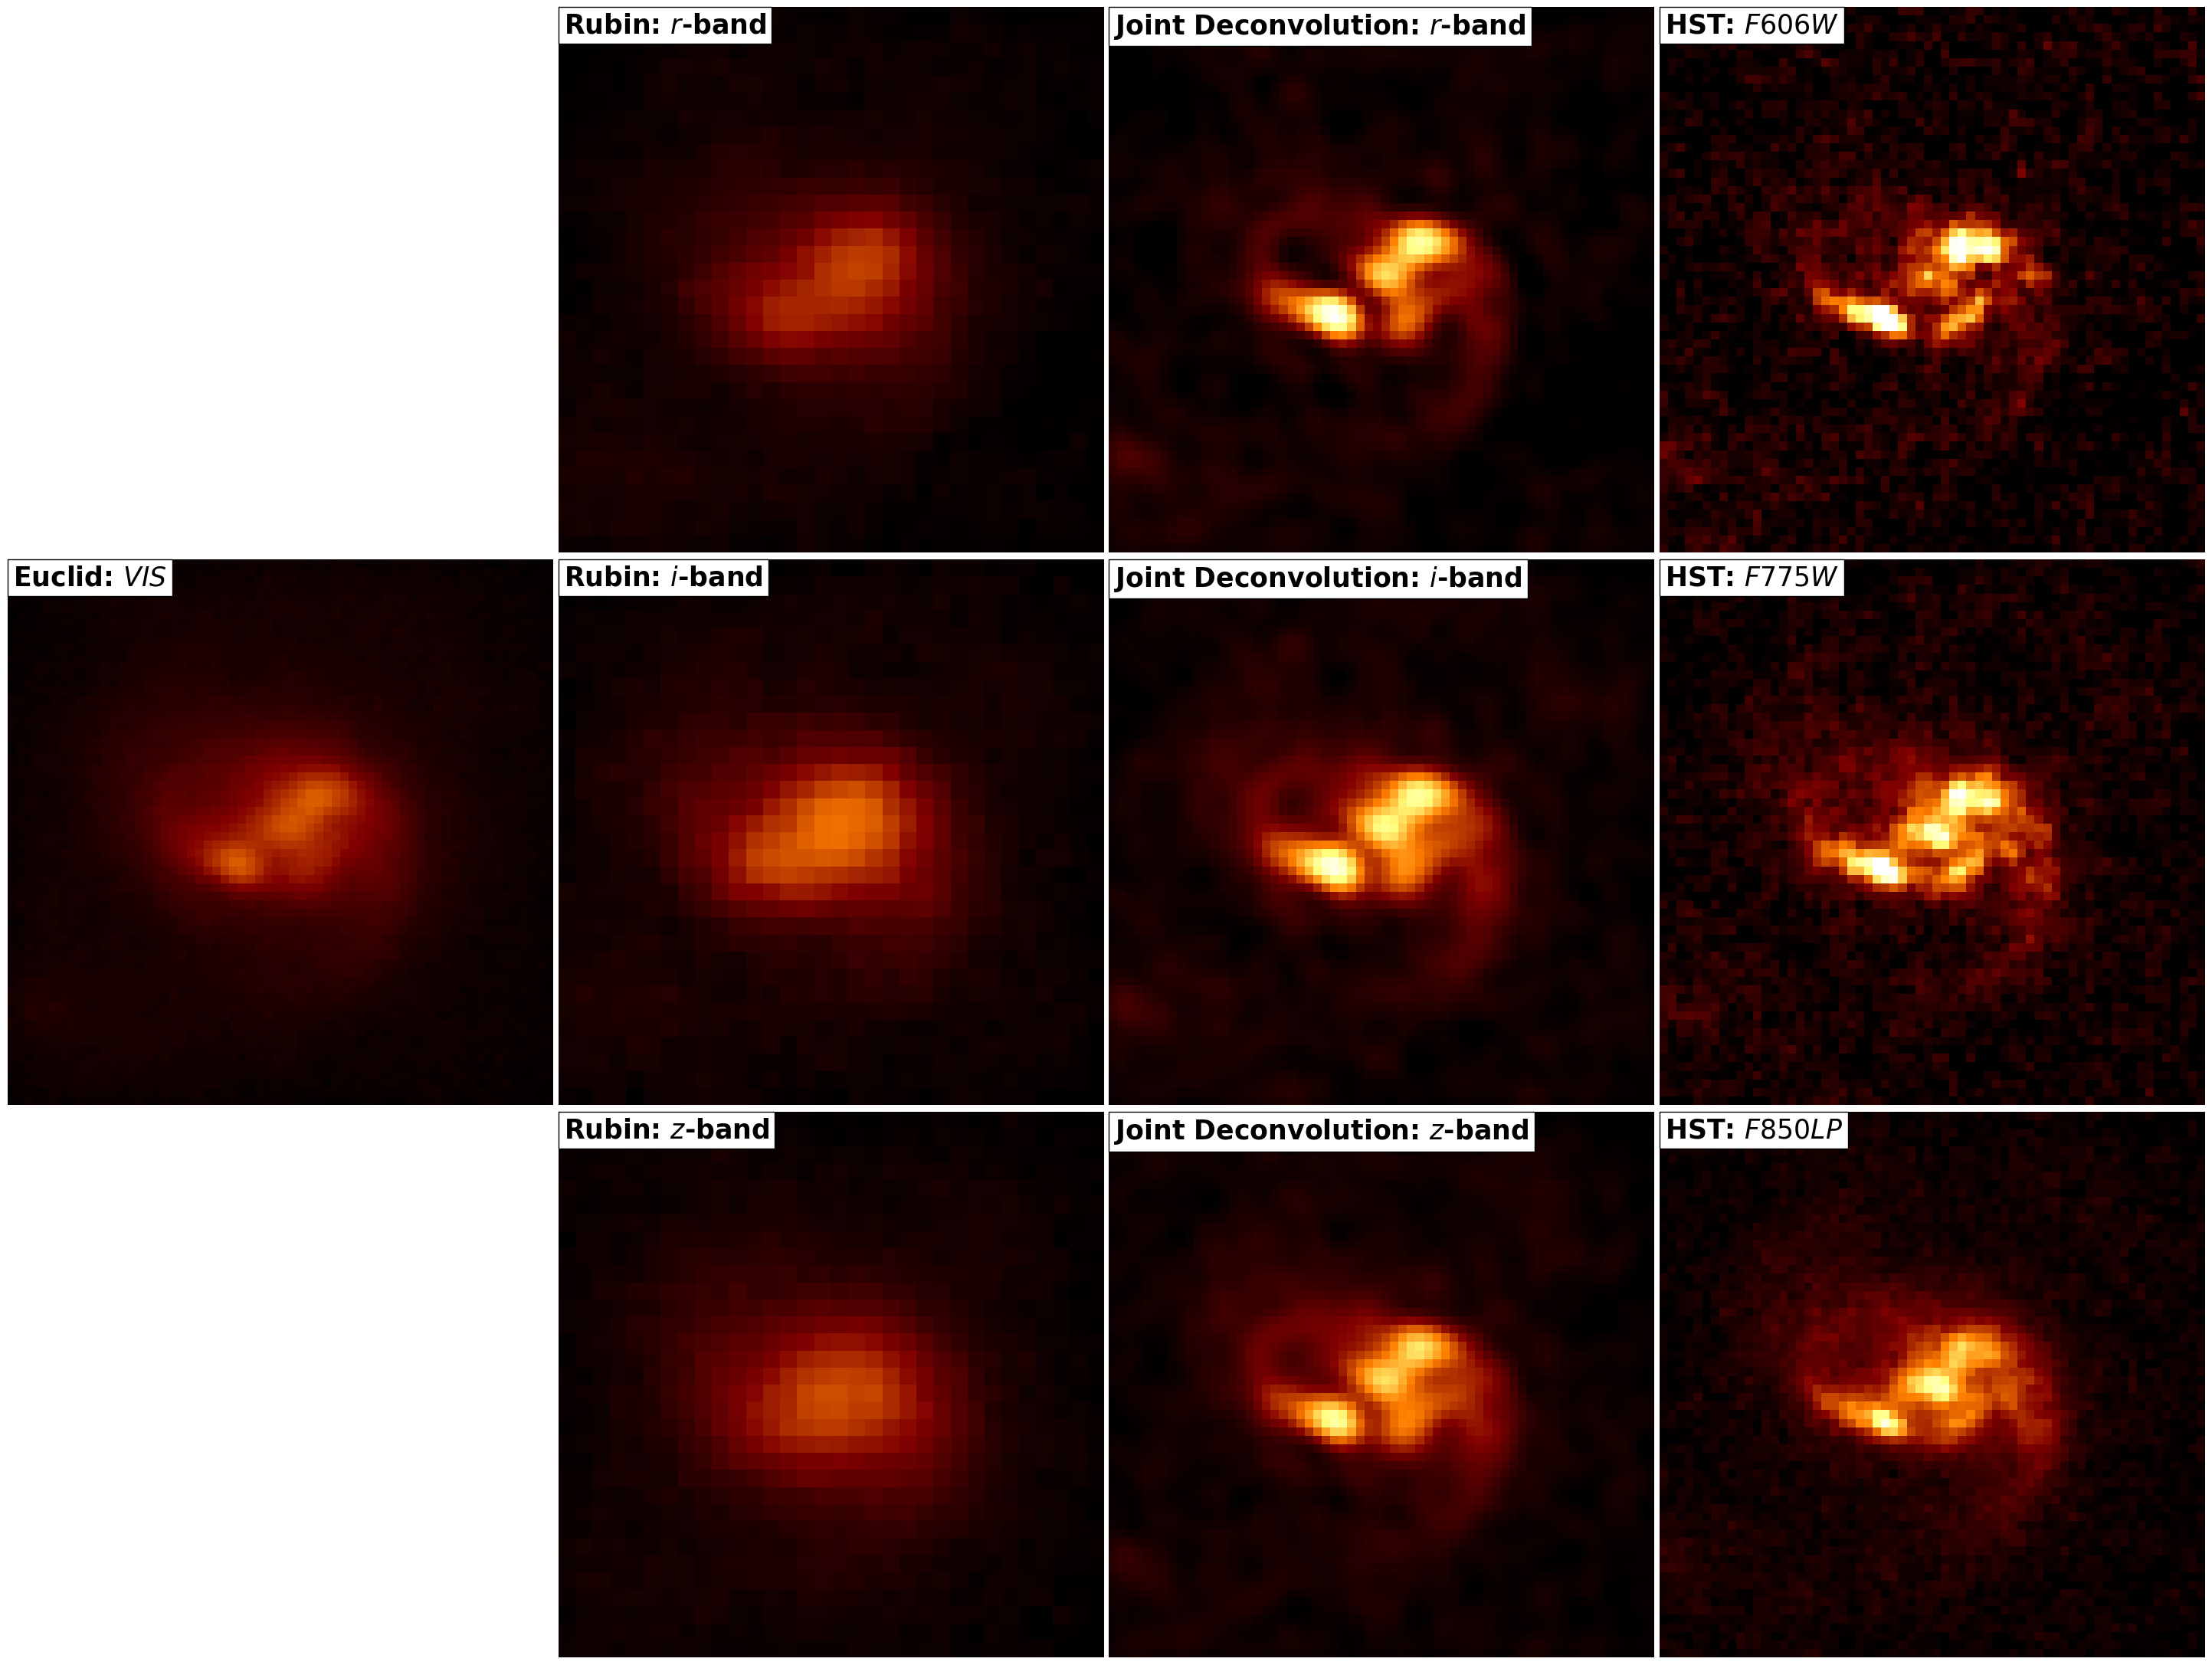

In [6]:
fig = comparison_normcbar(target, 
                          noisy, 
                          euclid, 
                          mbdeconv, 
                          labels = ['Rubin','Joint Deconvolution','HST'], 
                          figsize=(37,28))
plt.show(fig)